# 利用机器学习测试你的心动指数

## 数据集下载

In [1]:
!wget https://pai-public-data.oss-cn-beijing.aliyuncs.com/speed_dating/Speed%20Dating%20Data%20Key.doc

--2021-07-01 00:57:55--  https://pai-public-data.oss-cn-beijing.aliyuncs.com/speed_dating/Speed%20Dating%20Data%20Key.doc
Resolving pai-public-data.oss-cn-beijing.aliyuncs.com (pai-public-data.oss-cn-beijing.aliyuncs.com)... 49.7.22.39
Connecting to pai-public-data.oss-cn-beijing.aliyuncs.com (pai-public-data.oss-cn-beijing.aliyuncs.com)|49.7.22.39|:443... connected.
^C


In [2]:
!wget https://pai-public-data.oss-cn-beijing.aliyuncs.com/speed_dating/Speed%20Dating%20Data.csv

--2021-06-21 10:36:42--  https://pai-public-data.oss-cn-beijing.aliyuncs.com/speed_dating/Speed%20Dating%20Data.csv
Resolving pai-public-data.oss-cn-beijing.aliyuncs.com (pai-public-data.oss-cn-beijing.aliyuncs.com)... 49.7.22.39
Connecting to pai-public-data.oss-cn-beijing.aliyuncs.com (pai-public-data.oss-cn-beijing.aliyuncs.com)|49.7.22.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5192296 (5.0M) [text/csv]
Saving to: ‘Speed Dating Data.csv’

Speed Dating Data.c 100%[===================>]   4.95M   241KB/s    in 20s     

2021-06-21 10:37:03 (250 KB/s) - ‘Speed Dating Data.csv’ saved [5192296/5192296]



## 安装以及引入调用的包

In [3]:
!pip install palettable --user

Looking in indexes: https://pypi.python.org/pypi
     |████████████████████████████████| 111 kB 892 kB/s eta 0:00:01
You should consider upgrading via the '/home/data/xinyuan/.conda/envs/adv_rob_lxy/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install imbalanced-learn --user

Looking in indexes: https://pypi.python.org/pypi
     |████████████████████████████████| 206 kB 414 kB/s eta 0:00:01
You should consider upgrading via the '/home/data/xinyuan/.conda/envs/adv_rob_lxy/bin/python -m pip install --upgrade pip' command.


In [6]:
!pip install seaborn --user

    100% |################################| 225kB 13.2MB/s 
You are using pip version 9.0.1, however version 20.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
# importing packages
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

import imblearn
from palettable.colorbrewer.qualitative import Pastel1_3



Bad key "text.kerning_factor" on line 4 in
/home/data/xinyuan/.conda/envs/adv_rob_lxy/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


## EDA 探索性数据分析

In [2]:
df = pd.read_csv('Speed Dating Data.csv', encoding='gbk')
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
print(df.shape)

(8378, 195)


In [4]:
# 计算出每个特征有多少百分比是缺失的
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({
    'column_name': df.columns,
    'percent_missing': percent_missing
})

In [5]:
missing_value_df.sort_values(by='percent_missing', ascending=False).head(80)

,column_name,percent_missing
num_in_3,num_in_3,92.026737
numdat_3,numdat_3,82.143710
expnum,expnum,78.515159
sinc7_2,sinc7_2,76.665075
amb7_2,amb7_2,76.665075
...,...,...
amb4_2,amb4_2,31.069468
shar2_2,shar2_2,31.069468
amb2_2,amb2_2,31.069468
fun2_2,fun2_2,31.069468


### 多少人通过Speed Dating找到了对象

[6998 1380]


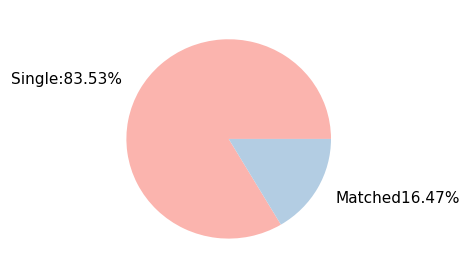

In [6]:
# 多少人通过Speed Dating找到了对象
plt.subplots(figsize=(3,3), dpi=110,)
# 构造数据
size_of_groups=df.match.value_counts().values

print(size_of_groups)

single_percentage = round(size_of_groups[0]/sum(size_of_groups) * 100,2) 
matched_percentage = round(size_of_groups[1]/sum(size_of_groups)* 100,2) 
names = [
    'Single:' + str(single_percentage) + '%',
    'Matched' + str(matched_percentage) + '%']
 
# 创建饼图
plt.pie(
    size_of_groups, 
    labels=names, 
    labeldistance=1.2, 
    colors=Pastel1_3.hex_colors
)
plt.show()


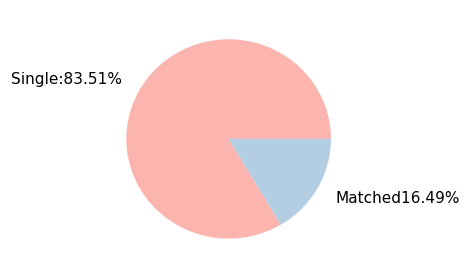

In [7]:
# 多少女生通过Speed Dating找到了对象
plt.subplots(figsize=(3,3), dpi=110,)
# 构造数据
size_of_groups=df[df.gender == 0].match.value_counts().values

single_percentage = round(size_of_groups[0]/sum(size_of_groups) * 100,2) 
matched_percentage = round(size_of_groups[1]/sum(size_of_groups)* 100,2) 
names = [
    'Single:' + str(single_percentage) + '%',
    'Matched' + str(matched_percentage) + '%']
 
# 创建饼图
plt.pie(
    size_of_groups, 
    labels=names, 
    labeldistance=1.2, 
    colors=Pastel1_3.hex_colors
)
plt.show()


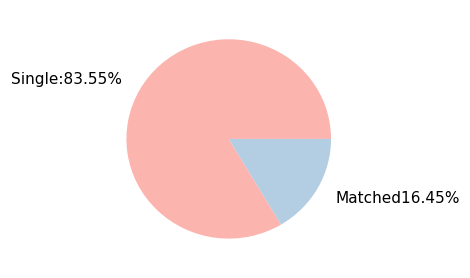

In [8]:
# 多少男生通过Speed Dating找到了对象
plt.subplots(figsize=(3,3), dpi=110,)
# 构造数据
size_of_groups=df[df.gender == 1].match.value_counts().values

single_percentage = round(size_of_groups[0]/sum(size_of_groups) * 100,2) 
matched_percentage = round(size_of_groups[1]/sum(size_of_groups)* 100,2) 
names = [
    'Single:' + str(single_percentage) + '%',
    'Matched' + str(matched_percentage) + '%']
 
# 创建饼图
plt.pie(
    size_of_groups, 
    labels=names, 
    labeldistance=1.2, 
    colors=Pastel1_3.hex_colors
)
plt.show()


### 年龄分布

Text(0,0.5,'Frequency')

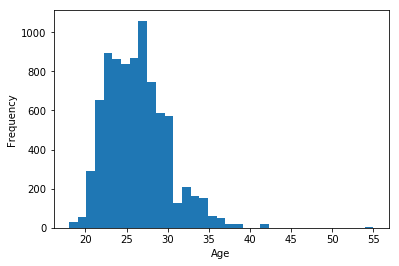

In [9]:
# 年龄分布
age = df[np.isfinite(df['age'])]['age']
plt.hist(age,bins=35)
plt.xlabel('Age')
plt.ylabel('Frequency')

In [10]:
date_df = df[[
    'iid', 'gender', 'pid', 'match', 'int_corr', 'samerace', 'age_o',
       'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb',
       'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'like_o',
       'prob_o', 'met_o', 'age', 'race', 'imprace', 'imprelig', 'goal', 'date',
       'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'attr1_1',
       'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'attr3_1', 'sinc3_1',
       'fun3_1', 'intel3_1', 'dec', 'attr', 'sinc', 'intel', 'fun', 'like',
       'prob', 'met'
]]

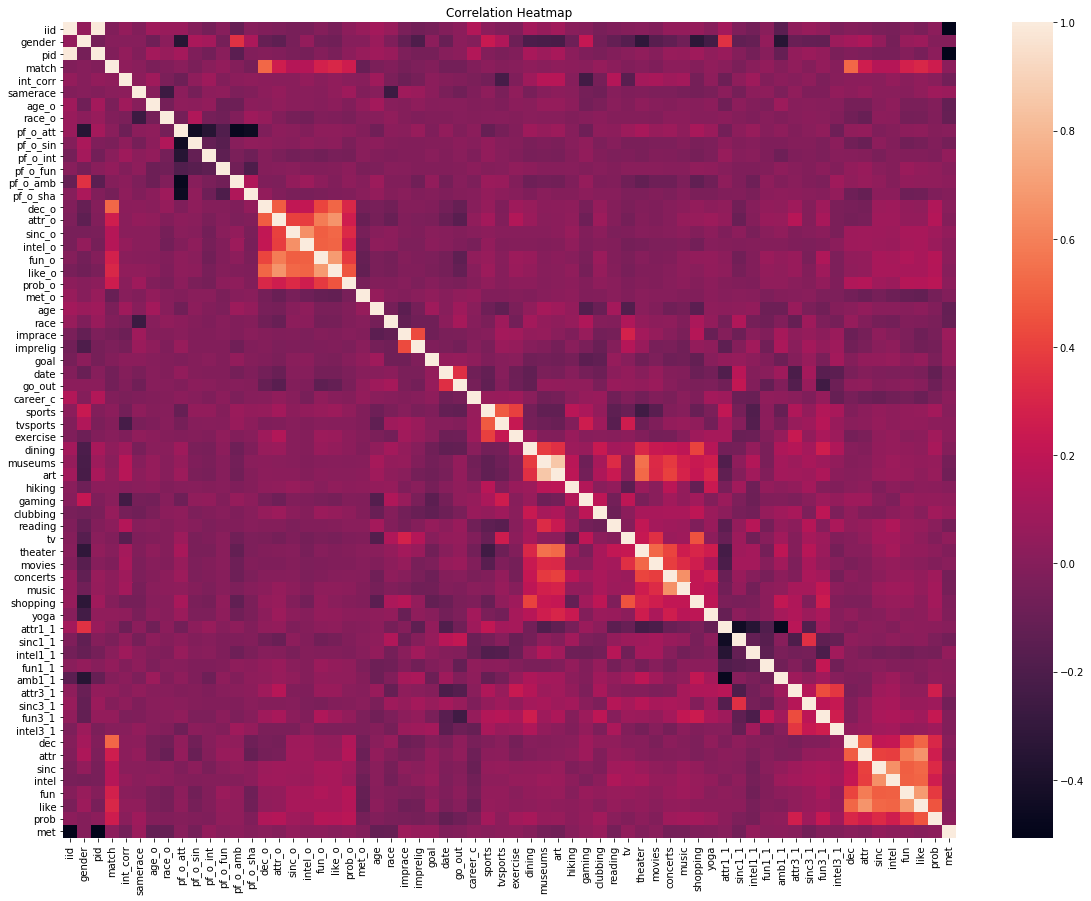

In [11]:
# heatmap
plt.subplots(figsize=(20,15))
plt.tick_params(labelsize=23)
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = date_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## 模型构建

### 数据准备

In [21]:
# preparing the data
clean_df = df[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','match']]
# print(clean_df.shape)
clean_df.dropna(inplace=True)
# print(clean_df.shape)
X=clean_df[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o',]]
y=clean_df['match']


(8378, 7)
(7031, 7)


/home/data/xinyuan/.conda/envs/adv_rob_lxy/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [22]:
oversample = imblearn.over_sampling.SVMSMOTE()
X, y = oversample.fit_resample(X, y)

[5818 5818]


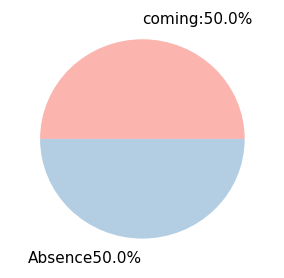

In [36]:
# 多少人通过Speed Dating找到了对象
plt.subplots(figsize=(3,3), dpi=110,)
# 构造数据
size_of_groups=y.value_counts().values

print(size_of_groups)

single_percentage = round(size_of_groups[0]/sum(size_of_groups) * 100,2) 
matched_percentage = round(size_of_groups[1]/sum(size_of_groups)* 100,2) 
names = [
    'coming:' + str(single_percentage) + '%',
    'Absence' + str(matched_percentage) + '%']
 
# 创建饼图
plt.pie(
    size_of_groups, 
    labels=names, 
    labeldistance=1.2, 
    colors=Pastel1_3.hex_colors
)
plt.show()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

print(X.shape, y.shape)
print(X_train.shape, y_train.shape)

(11636, 6) (11636,)
(9308, 6) (9308,)


### 模型训练

In [26]:
# logistic regression classification model
model = LogisticRegression(C=1, random_state=0)
lrc = model.fit(X_train, y_train)
predict_train_lrc = lrc.predict(X_train)
predict_test_lrc = lrc.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_lrc))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_lrc))

Training Accuracy: 0.7295874516544908
Validation Accuracy: 0.7401202749140894


### 测试结果

In [28]:
lrc.predict_proba([[8.0,6.0,7.0,7.0,6.0,8.0,]])

array([[0.29029958, 0.70970042]])

In [35]:
clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, X_train, y_train, cv=10)


array([0.80880773, 0.81954887, 0.83780881, 0.81632653, 0.8141783 ,
       0.80665951, 0.81310419, 0.81310419, 0.81505376, 0.80430108])

In [40]:
etc = ExtraTreesClassifier()
cross_val_score(etc, X_train, y_train, cv=10)

array([0.85929108, 0.85929108, 0.87325456, 0.88077336, 0.87540279,
       0.85929108, 0.86143931, 0.88077336, 0.8655914 , 0.86236559])